<a href="https://colab.research.google.com/github/alexacondori/ALURA_INMERSION_DE_DATOS/blob/main/ALURA_INMERSION_DATOS_SEGUNDA_CLASE_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEGUNDA CLASE ALURA


In [1]:
#para conectar colab con mi drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
#importamos la base de datos del drive
inmuebles = pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/inmuebles_bogota.csv')
#nos muestra los 5 primeras filas
inmuebles.head()
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
inmuebles.Valor[0]

'$ 360.000.000'

In [3]:
#debido a que esta variable es de tipo string, la convertiremos a formato numerico
type(inmuebles.Valor[0])
inmuebles.Valor[0]+inmuebles.Valor[1]#se observa que no suma esta concatenando ya que son de tipo string

'$ 360.000.000$ 670.000.000'

In [4]:
#split separar una cadena de texto en funcion de un parameto
inmuebles.Valor[0].split()
#tomara los espacios en blanco despues del dolar y hara la separacion

['$', '360.000.000']

In [5]:
#Aplicando a toda la columna de valor
inmuebles.Valor.str.split()
#ya que esta en lista lo convertimos en dataframe lo cual sera en 2 columnas
inmuebles.Valor.str.split(expand=True)

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [6]:
#generar nuevas columnas con los los nuevos atributos
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0] #atributo 1
inmuebles['Precio'] = valor[1] #atributo 2
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio
5047,Apartamento,Apartamento en venta en Teusaquillo,4,3,122,Teusaquillo,Teusaquillo,$ 390.000.000,$,390.000.000
1734,Apartamento,Apartamento en venta en San Patricio,3,3,142,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 830.000.000,$,830.000.000
1476,Apartamento,Apartamento en venta en Usaquén,2,1,54,Usaquén,Usaquén,$ 255.000.000,$,255.000.000


In [7]:
#los valores de Precio aun son strin por el punto o rello lo reemplazaremos
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [8]:
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [9]:
#convertimos de string a numerico
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Baños          9520 non-null   int64  
 4   Área           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [10]:
inmuebles.describe()

,Habitaciones,Baños,Área,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [11]:
pd.set_option('display.precision',2)
inmuebles.describe()

,Habitaciones,Baños,Área,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [12]:
#localizamos algun dato de una variable que deseamos con una condicion
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.0


<Axes: ylabel='Frequency'>

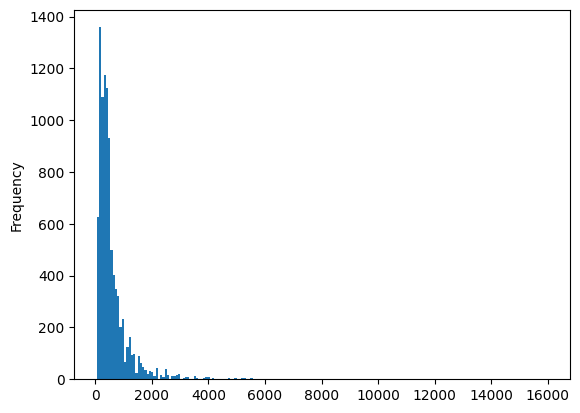

In [13]:
inmuebles['Precio_Millon'].plot.hist(bins=200)

In [14]:
import seaborn as sns

<Axes: xlabel='Precio_Millon', ylabel='Count'>

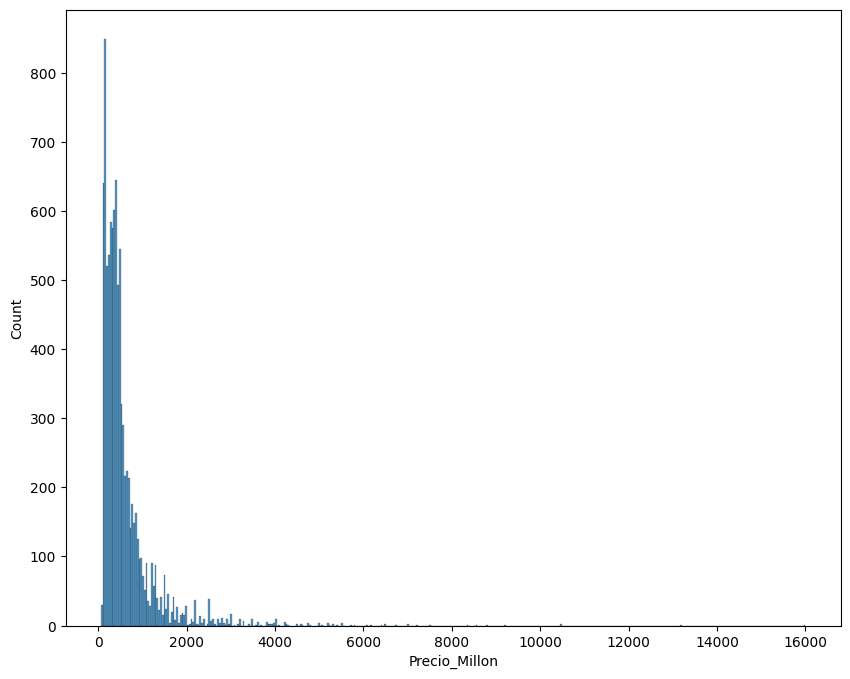

In [15]:
plt.figure(figsize=(10,8)) #(ancho ,altura)
sns.histplot(data=inmuebles,x='Precio_Millon')


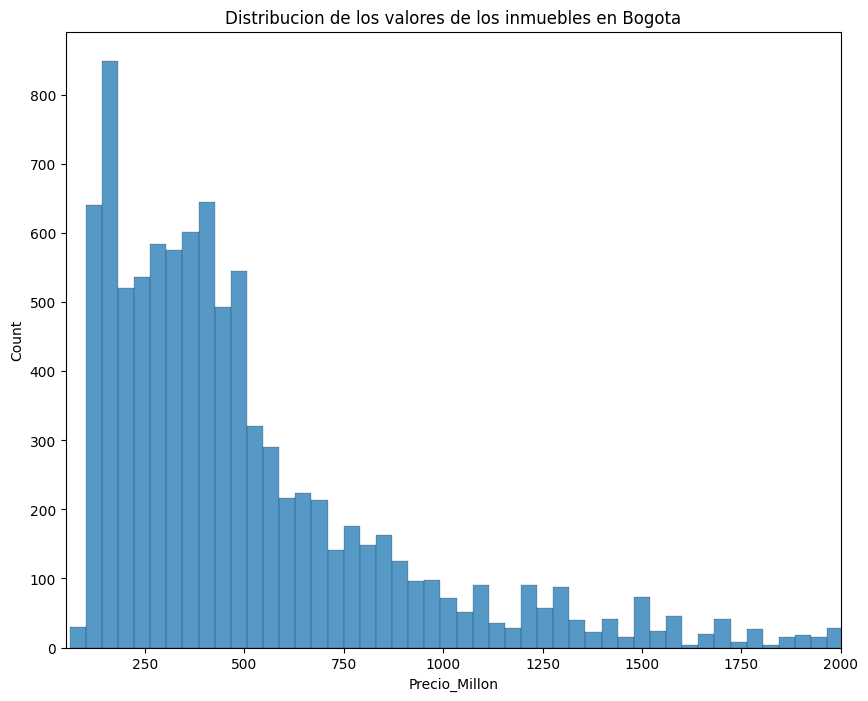

In [16]:
plt.figure(figsize=(10,8))
grafica = sns.histplot(data=inmuebles, x = 'Precio_Millon')
grafica.set_title('Distribucion de los valores de los inmuebles en Bogota')
plt.xlim(50,2000)# limite desde el valor min y max
plt.show()

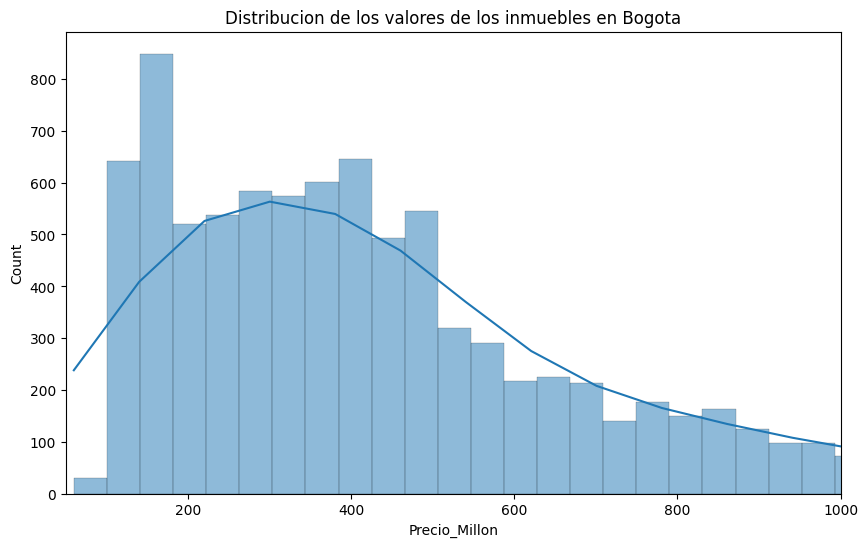

In [17]:
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x = 'Precio_Millon', kde=True)
grafica.set_title('Distribucion de los valores de los inmuebles en Bogota')
plt.xlim(50,1000)# limite desde el valor min y max
# para guardar la imagen
# plt.save('camino completo donde guardaremos.png',format='png')
plt.show()

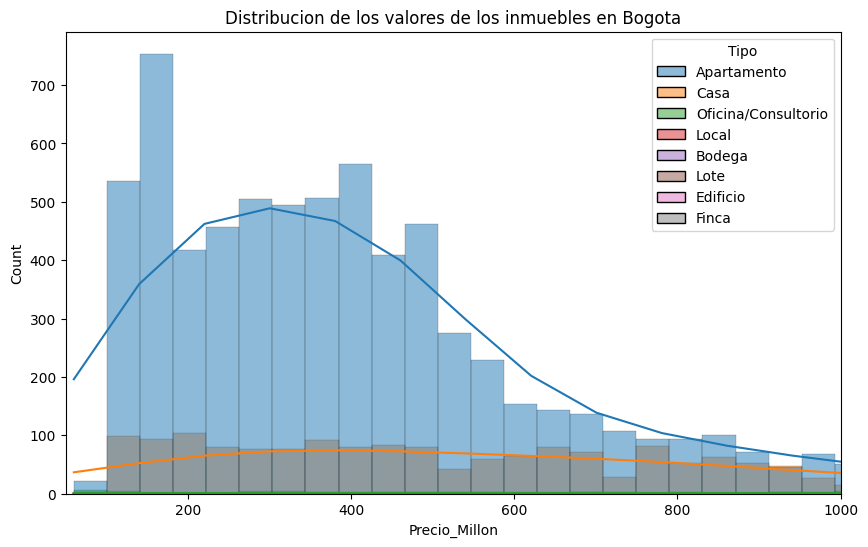

In [18]:
#si deseamos agregar datos de otra variables(agregar otra dimension)
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x = 'Precio_Millon', kde=True,hue ='Tipo')
grafica.set_title('Distribucion de los valores de los inmuebles en Bogota')
plt.xlim(50,1000)# limite desde el valor min y max
plt.show()

# SEGUNDO RETO
 Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información).


In [19]:
tipos_inmuebles=inmuebles.loc[(inmuebles.Tipo == 'Local')|(inmuebles.Tipo =='Finca')|(inmuebles.Tipo=='Lote')]
tipos_inmuebles.head(2)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
330,Local,Local en venta en Chapinero,2,2,74,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 350.000.000,$,350000000,350.0
1177,Local,Local en venta en Barrios Unidos,12,6,620,Barrios Unidos,Los Andes,$ 2.000.000.000,$,2000000000,2000.0


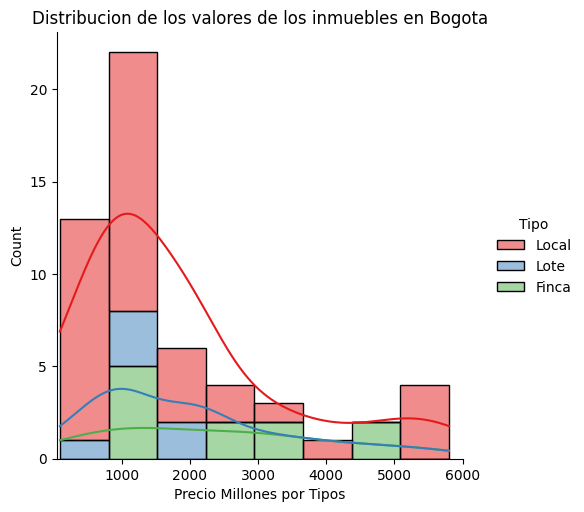

In [20]:
grafica = sns.displot(data=tipos_inmuebles, x = 'Precio_Millon',kde=True, hue ='Tipo', palette='Set1',
                       kind='hist',multiple='stack')
grafica.set_axis_labels(x_var='Precio Millones por Tipos')
plt.title('Distribucion de los valores de los inmuebles en Bogota')
plt.xlim(50,6000)

plt.show()